# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
#import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 300
import matplotlib.pyplot as plt
# %run ../PyModules/exporter.py
%run PyModules/exporter.py

import numpy as np

# von mir
from scipy.optimize import curve_fit
from joblib import Parallel, delayed

import sys
sys.path.insert(0, './../')

from PyModules.utilities import do_async, integer_hill_climb, wait
import time
    
import datetime

from PyModules.paula_viewer import PAULA_V
# paula = PAULA_V(results_path='/Volumes/p-home/Results/tiamo4.sync', cache_path='./data/', 
#                 log_file='./data/log_p.txt', 
#                 log_file_org='/Volumes/p-home/Software/EIOS.git/Notebooks/data/log.txt', dark=False)

paula = PAULA_V(results_path='afp://qsim@qsim-paula.local/p-home/Results/tiamo4.sync', cache_path='/home/robboss/Documents/FilesForPython/data/', 
                log_file='/home/robboss/Documents/FilesForPython/data/log_p.txt', 
                log_file_org='/home/robboss/Documents/FilesForPython/data/log.txt', dark=False)

paula.copy_latest_log_file()

print('Last Updated On: ', datetime.datetime.now())

-------------------------------------
Get latest log file... please wait...
File not updated - Version: 2020-06-04 17:48:48
-------------------------------------
Last Updated On:  2020-08-06 11:28:40.194826


In [2]:
paula.copy_latest_log_file()

-------------------------------------
Get latest log file... please wait...
File not updated - Version: 2020-06-04 17:48:48
-------------------------------------


In [3]:
#paula.get_wvm_status()

In [4]:
paula

# Check e-lab notes 

In [3]:
name_l = paula.get_run_list(paula.log_file, '2020-04-30 17:', script='1')

Found the follwoing runs:
2020-04-30 17:00:20 run remote fr_exc 17_00_05_30_04_2020.dat
2020-04-30 17:00:49 run remote fr_shift_sq_mf 17_00_30_30_04_2020.dat
2020-04-30 17:01:13 run remote phs_tckl 17_00_50_30_04_2020.dat
2020-04-30 17:01:49 run remote fr_exc 17_01_34_30_04_2020.dat
2020-04-30 17:08:06 run remote fr_exc 17_07_52_30_04_2020.dat
2020-04-30 17:08:58 run remote fr_exc 17_08_44_30_04_2020.dat
2020-04-30 17:10:23 run PDQ_LF_FScan fr_tickle_s 17_10_17_30_04_2020.dat
2020-04-30 17:10:31 run PDQ_MF_FScan fr_tickle_s 17_10_25_30_04_2020.dat
2020-04-30 17:10:38 run PDQ_HF_FScan fr_tickle_s 17_10_32_30_04_2020.dat
2020-04-30 17:11:14 run remote fr_exc 17_11_00_30_04_2020.dat
2020-04-30 17:11:33 run remote fr_shift_sq_mf 17_11_15_30_04_2020.dat
2020-04-30 17:11:58 run remote phs_tckl 17_11_34_30_04_2020.dat
2020-04-30 17:12:47 run remote fr_exc 17_12_33_30_04_2020.dat
2020-04-30 17:13:23 run remote fr_exc 17_13_08_30_04_2020.dat
2020-04-30 17:14:27 run remote fr_exc 17_14_13_30_04_

In [6]:
#%%export Labbook
session_l = paula.get_session_list(paula.log_file, '2020-04-30 16:')

Found the follwoing sessions:
2020-04-30-16-23-57 - Check ion position: update? True
2020-04-30-16-24-16 - Optimize BD
2020-04-30-16-24-31 - MW transitions 0
2020-04-30-16-24-59 - Mode frequency
2020-04-30-16-26-01 - Mode frequency
2020-04-30-16-37-06 - Check ion position: update? True
2020-04-30-16-37-27 - Optimize BD
2020-04-30-16-37-42 - MW transitions 0
2020-04-30-16-38-06 - Mode frequency
2020-04-30-16-39-05 - Mode frequency
2020-04-30-16-39-34 - Check ion position: update? True
2020-04-30-16-39-55 - Optimize BD
2020-04-30-16-40-15 - MW transitions 0
2020-04-30-16-40-50 - Mode frequency
2020-04-30-16-41-19 - Mode frequency
2020-04-30-16-59-36 - Mode frequency


In [5]:
ret = []
for session in session_l:
    ret.append(paula.session_replay(session, ips_l=[], show_details=False));

----------------------------------
Loading lab notes from: 2020-04-30-16-23-57
Check ion position: update? True
2020-06-08 11:55:43.062038
Please wait...
---------------------------------- 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


FileNotFoundError: [Errno 2] No such file or directory: 'afp://qsim@qsim-paula.local/p-home/Results/tiamo4.sync/2020/04_April/30/ML_wvf_sw_RF/EU_Ex/16_23_58_30_04_2020.dat'

# Check ion prop history

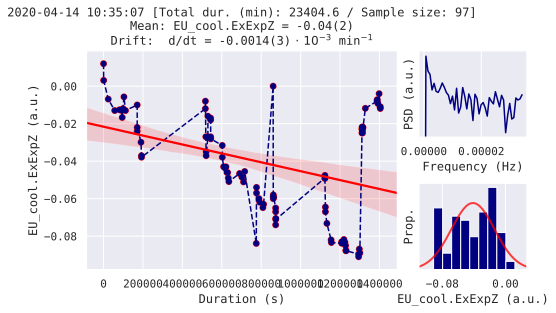

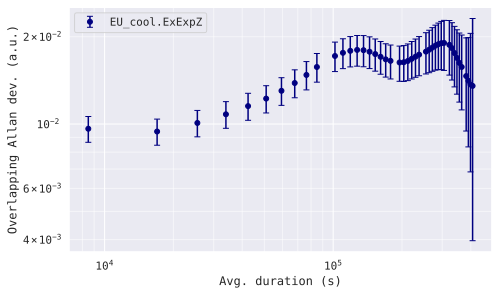

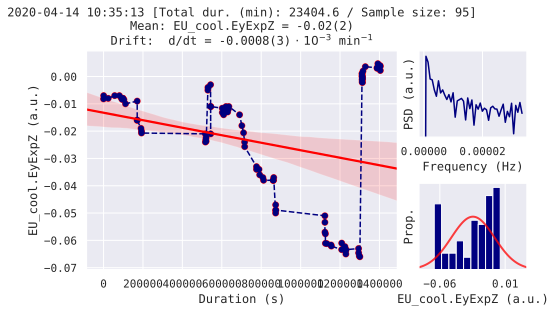

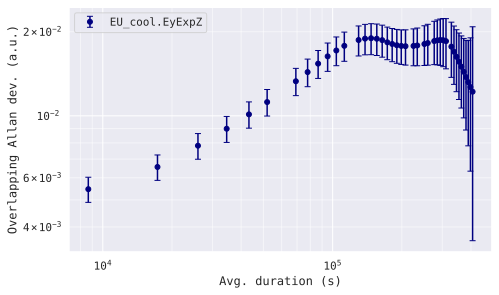

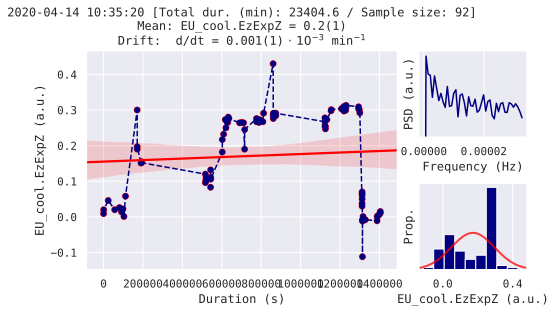

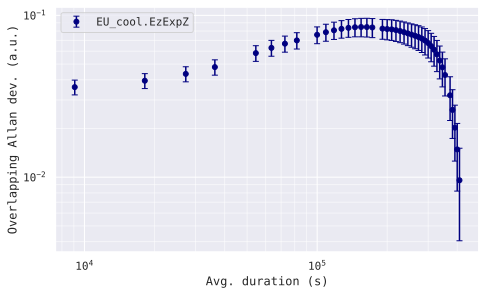

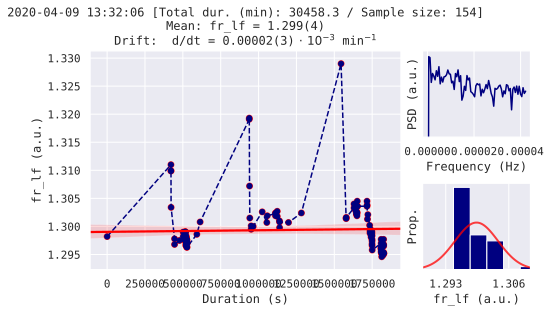

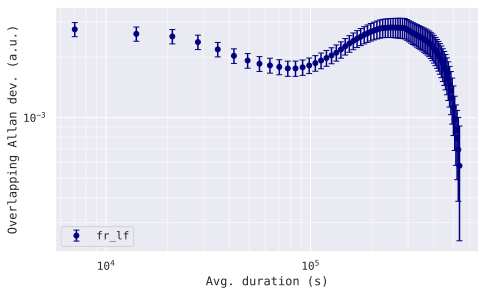

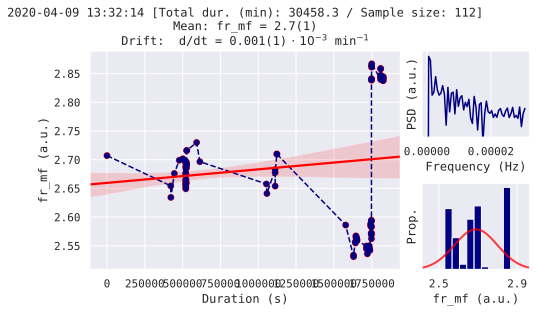

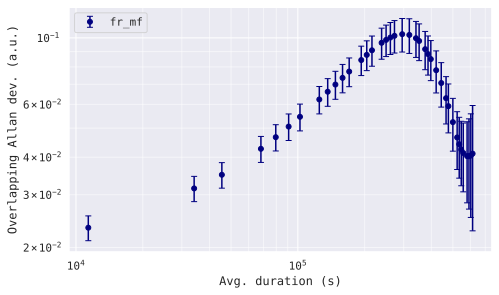

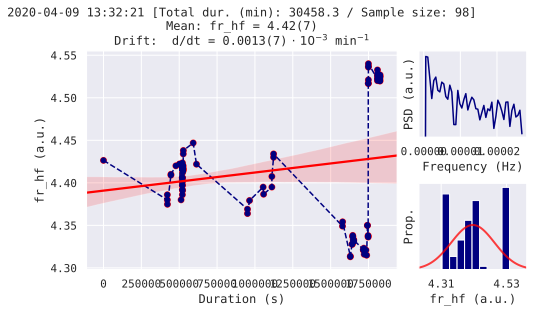

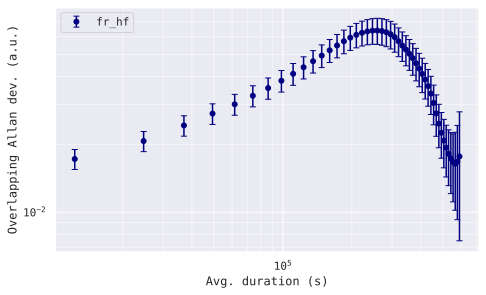

In [12]:
rng=['2020-04-09 13:16:00', '2020-04-30 23:59:59']
ret = paula.plt_longterm(ip_l=['EU_cool.ExExpZ','EU_cool.EyExpZ','EU_cool.EzExpZ', 'fr_lf', 'fr_mf', 'fr_hf'], rng=rng, verbose=True, rel=0);

In [29]:
rng=['2020-04-15 13:16:00', '2020-04-17 23:59:59']
#ret = paula.plt_longterm(ip_l=['fr_lf','fr_mf','fr_hf'], rng=rng, verbose=True, rel=1);

In [28]:
rng=['2020-02-01 10:16:00', '2020-04-15 23:59:59']
#ret = paula.plt_longterm(ip_l=['fr_mw_3p3_2p2', 'fr_mw_3p1_2p2', 'fr_lf', 'fr_mf', 'fr_hf'], rng=rng, verbose=True, rel=1);

# View raw data

In [7]:
fnames = paula.get_run_list(paula.log_file, '2020-04-30 17:08', script='')

Found the follwoing runs:
2020-04-30 17:08:06 run remote fr_exc 17_07_52_30_04_2020.dat
2020-04-30 17:08:58 run remote fr_exc 17_08_44_30_04_2020.dat


Files:  ['/Volumes/p-home/Results/tiamo4.sync/2020/04_April/30/Basic_Experiments/remote/17_07_52_30_04_2020.dat', '/Volumes/p-home/Results/tiamo4.sync/2020/04_April/30/Basic_Experiments/remote/17_08_44_30_04_2020.dat']


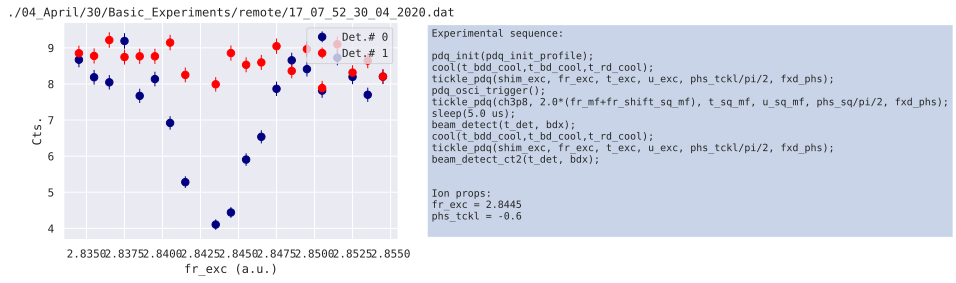

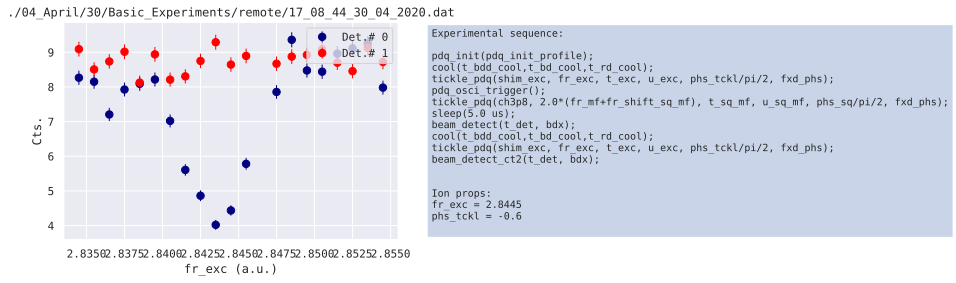

In [8]:
name_l, data_l, script_l, ips_l=paula.show_data(fnames, ips=['fr_exc','phs_tckl'])

# Sanbox

# 2020-02-27 Record data for reconstruction of Wigner fcts. (LF mode)

[Leibfried, D. et al. Experimental Determination of the Motional Quantum State of a Trapped Atom. Phys. Rev. Lett. 77, 4281–4285 (1996)]

In [3]:
from PyModules.analyse_eios import eios_sb
from qutip import *
from joblib import Parallel, delayed
import os

def select_files(files,start,end,print_len=True):
    res = []
    for file in files:
        h = int(file[-23:-21])
        m = int(file[-20:-18])
        s = int(file[-17:-15])
        if start[0]*3600+start[1]*60+start[2] <= h*3600+m*60+s <= end[0]*3600+end[1]*60+end[2]:
            res.append(file)
    if print_len:
        print(len(res),'files')
    return res

## Ulrichs Messung

In [28]:
#Get Wigner results Displ state
t1 = time.time()

fnames=[  
    '/2020/02_Februar/27/Basic_Experiments/remote/15_47_21_27_02_2020.dat',
    '/2020/02_Februar/27/Basic_Experiments/remote/15_48_14_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_49_07_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_50_00_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_50_54_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_51_47_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_52_40_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_53_33_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_54_27_27_02_2020.dat', 
    '/2020/02_Februar/27/Basic_Experiments/remote/15_55_20_27_02_2020.dat'
]


Nt = 10
Tmax=15
nmax=6
#Fit Displ. and calibrate alpha(t)
# fres=[]
# for i in range(Nt):
# #     Tt=Tmax/Nt*i
#     fres.append([Tmax/Nt*i,
#                  np.array(paula.single_fit_sb([paula.results_path+fnames[i]],
#                             mode_freq=1.3, mode_angle=0, Rabi_init=0.113, dec_init=0.015,
#                             limb_init=0.5, limr_init=0.5, fock=1, nmax=nmax, fix=[0,0,0,0,1,1,1])) ]);

# do it parallel, is faster
files = [paula.results_path+f for f in fnames]
# files = ['data/2020_07_30/'+f for f in fnames2]

def func(i):
    return [Tmax/Nt*i,
                 np.array(paula.single_fit_sb([files[i]],
                            mode_freq=1.3, mode_angle=0, Rabi_init=0.113, dec_init=0.015,
                            limb_init=0.5, limr_init=0.5,
                            fock=1, nmax=nmax, 
                            fix=[0,0,0,0,1,1,1]))
                            ]

fres = Parallel(n_jobs=-1, verbose=11)(delayed(func)(i) for i in range(len(files)))
time.sleep(0.1)

print('finished, took ', time.time()-t1, 's')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    5.3s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    5.6s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    5.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    6.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    8.8s remaining:    2.2s


finished, took  15.953324556350708 s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.8s finished


In [29]:
def get_W_from_focks(fres):
    dat_x=[]
    dat_y=[]
    dat_err=[]
    dat=[]
    for i in range(10):
        dat_x.append(fres[i][0]*0.105)
        pops=fres[i][1][2][-1]
        pops_err=fres[i][1][3][-1]
        print(pops)
        erg=0
        erg_err=0
        for k in range(len(pops)):
            erg+=(-1)**k*pops[k]
            erg_err+=(-1)**k*pops_err[k]
        dat_y.append(2/np.pi*erg)
        dat_err.append(2/np.pi*erg_err) 
    return(np.array([[dat_x[i], dat_y[i], dat_err[i]] for i in range(len(dat_x))]))

dat = get_W_from_focks(fres)
# print(dat)

[0.04185742203726211, 0.8966760271750315, 0.032400874038907276, 0.029063577968439655, 1.8072691866382436e-10, 2.098599632699954e-06]
[9.439305217426191e-09, 0.7788182856719752, 0.192201856523177, 0.02897727689080059, 2.106332627659506e-06, 4.651421141966218e-07]
[0.20517791044648995, 0.5877773322786498, 0.1883076735120999, 0.015099589761682158, 0.0036374924572513544, 1.543826817262881e-09]
[0.22830159031467492, 0.38832818910005185, 0.2097401262671451, 0.12373635849342551, 0.03202462304657226, 0.017869112778130417]
[0.25330453579183115, 0.22401541536412312, 0.24689377912546645, 0.20641315621373788, 0.06935341475891707, 1.9698745924557026e-05]
[0.28964749792919675, 0.10599539191479988, 0.27900538817188136, 6.444638153991555e-06, 0.2076926510460601, 0.11765262629990787]
[0.3430894962538949, 0.06758574352492436, 0.1273643846096381, 0.15552371959745384, 0.15193145461587604, 0.1545052013982126]
[0.3638787395400545, 1.9712289724043315e-06, 0.15002081577474496, 0.08625587946971719, 0.399835949

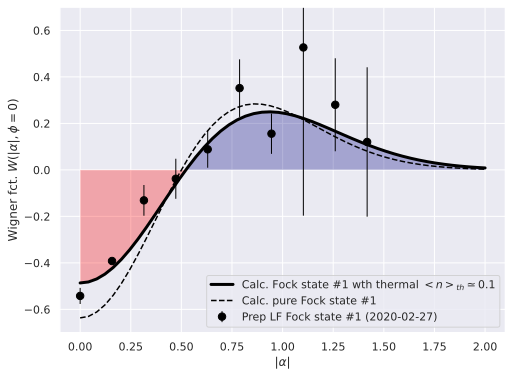

In [30]:
#Plot Wigner results Fock state

Nc=10

rho_pure = fock_dm(Nc, 1)

a = destroy(Nc)
rho = a.dag()*thermal_dm(Nc, .1)*a

sim_dat_x=[]
sim_dat_y=[]
sim_dat_pure=[]

for a in np.linspace(0, 2., 50):
        sim_dat_x.append(a)
        sim_dat_y.append(2*wigner(rho, 2**0.5*a,0)[0,0])
        sim_dat_pure.append(2*wigner(rho_pure, 2**0.5*a,0)[0,0])
  
sim_dat_x=np.array(sim_dat_x)
sim_dat_y=np.array(sim_dat_y)
sim_dat_pure=np.array(sim_dat_pure)

##Data for LF fck state 1 2020-02-27
# [pts_x,pts_y,pts_err]=[dat_x, dat_y, dat_err]
[pts_x,pts_y,pts_err]=np.transpose(dat)
##

fig, ax = plt.subplots(1, 1, figsize=(8,6), sharex=True)
plt.errorbar(pts_x, pts_y, yerr=pts_err, marker = 'o', markersize=7.5, color='Black', lw=1., ls='',fmt='',capsize=.0, label='Prep LF Fock state #1 (2020-02-27)')

plt.plot(sim_dat_x, sim_dat_y, color='black', linewidth=3, label='Calc. Fock state #1 wth thermal $<n>_{th}\simeq0.1$')
plt.plot(sim_dat_x, sim_dat_pure, color='black', linestyle='dashed', label='Calc. pure Fock state #1')
plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y >= 0, facecolor='Navy', interpolate=True, alpha=.3)
plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y <= 0, facecolor='Red', interpolate=True, alpha=.3)
plt.xlabel(r'$|\alpha|$')
plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.legend()
plt.ylim(-.7,.7)
plt.show()

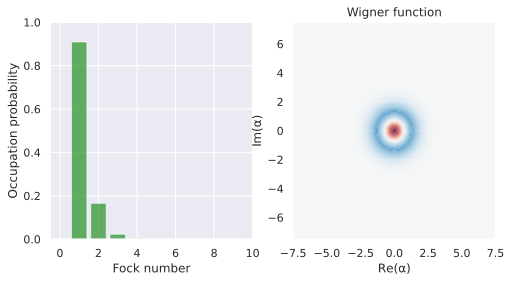

In [31]:
plot_wigner_fock_distribution(rho)
plt.show()

In [32]:
files = [paula.results_path+f for f in fnames]

ws, ws_err = [], []
for file in files:
    w, w_err = wigner_from_file(file, [5,6,7,8,9,10,11], verbose=True, parallel=True)
    ws.append(w)
    ws_err.append(w_err)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    5.0s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    5.6s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   10.1s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:   12.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    4.2s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    4.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    7.9s remaining:    5.9s
[Para

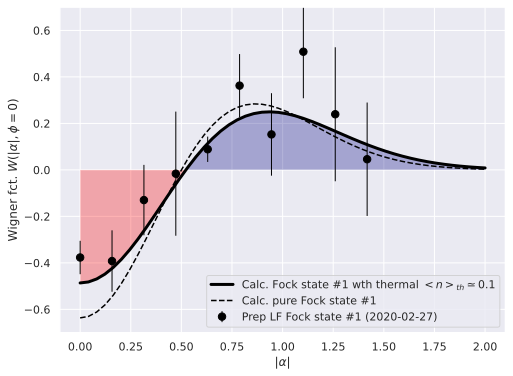

In [33]:
# same plot as above, but with the mean over differen Hilbert space dimensions, and with correct errors

fig, ax = plt.subplots(1, 1, figsize=(8,6), sharex=True)
x = np.linspace(0, 0.105*Tmax/Nt*(len(ws)-1), len(ws))
plt.errorbar(x, ws, ws_err, marker = 'o', markersize=7.5, color='Black', lw=1., ls='',fmt='',capsize=.0, label='Prep LF Fock state #1 (2020-02-27)')

plt.plot(sim_dat_x, sim_dat_y, color='black', linewidth=3, label='Calc. Fock state #1 wth thermal $<n>_{th}\simeq0.1$')
plt.plot(sim_dat_x, sim_dat_pure, color='black', linestyle='dashed', label='Calc. pure Fock state #1')
plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y >= 0, facecolor='Navy', interpolate=True, alpha=.3)
plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y <= 0, facecolor='Red', interpolate=True, alpha=.3)
plt.xlabel(r'$|\alpha|$')
plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.legend()
plt.ylim(-.7,.7)
plt.show()

## make function for paula

In [8]:
def get_pops_err(res, nmax):
    #get populations and their errors
    nth = res[2][-3]
    ncoh = res[2][-2]
    nsq = res[2][-1]

    nth_e = res[3][-3]
    ncoh_e = res[3][-2]
    nsq_e = res[3][-1]

    pops = np.transpose(eios_sb.mixedfockdist(nmax,nth,ncoh,nsq,1))[1]
#     print(pops)

    permuts = np.reshape(np.transpose(np.meshgrid([-1,1],[-1,1],[-1,1])),(-1,3))

    pops_err_list = []
    for permut in permuts:
    #     print(permut)
        pops_err_list.append(np.transpose(eios_sb.mixedfockdist(nmax,np.max([nth + permut[1]*nth_e, 1e-9]), np.max([ncoh + permut[1]*ncoh_e, 0]), np.max([nsq + permut[2]*nsq_e, 0]), 1))[1])

    pops_err = []
    for i, p in enumerate(pops):
        errs = np.abs(np.transpose(pops_err_list)[i]-p)
        pops_err.append(np.max(errs))
    
    return pops, pops_err


def get_W_from_focks(fres_list, fit_fock=1, n_dim=[5, 6, 7, 8]):
    '''argument should be a list of results from the paula.single_fit_sb function
    returns the wigner function (mean of the wigner function calculated from each result)'''
    
    dat_y=[]
    dat_err=[]
    for i, fres in enumerate(fres_list):
        if fit_fock:
            pops = fres[2][-1]
            pops_err = fres[3][-1]
        else:
            pops, pops_err = get_pops_err(fres, n_dim[i])
            
#         print(pops)
        erg, erg_err = 0, 0
        for k in range(len(pops)):
            erg += (-1)**k*pops[k]
#             erg_err += (-1)**k*pops_err[k]
            erg_err += pops_err[k]**2
        
        dat_y.append(2/np.pi*erg)
#         dat_err.append(2/np.pi*erg_err)
        dat_err.append(2/np.pi*np.sqrt(erg_err))

    return(np.array([[dat_y[i], dat_err[i]] for i in range(len(fres_list))]))



def wigner_from_file(file, n_dim = [5, 6, 7, 8], parallel = True, verbose=True, mode_freq=1.3, mode_angle=0, fit_fock=1, fix=[0,0,0,0,0,0,0], Rabi_init=0.169, dec_init=0.025, nth=0.5, ncoh=0.5):
    def func(n):
        return np.array(paula.single_fit_sb([file],
                            mode_freq=mode_freq, mode_angle=mode_angle, Rabi_init=Rabi_init, dec_init=dec_init, limb_init=0.5, limr_init=0.5, nth=nth, ncoh=ncoh,
                            fock=fit_fock, nmax=n, fix=fix))
    
    if parallel:
        if verbose:
            dd = 11
        else:
            dd = 0
        fres = Parallel(n_jobs=-1, verbose=dd)(delayed(func)(n) for n in n_dim)
    else:
        fres = [func(n) for n in n_dim]
        
#     print(fres)
    wigners = np.transpose(get_W_from_focks(fres, fit_fock=fit_fock, n_dim=n_dim))
    
    w = np.mean(wigners[0])
    w_err = np.sqrt(np.sum(wigners[1]**2)/len(wigners[1])**2) # correct error
#     w_err = np.std(wigners[0]) # error from scattering of different values for W (only good for long list of w's)
    print('result for mode freq.:', mode_freq,' and mode angle:', mode_angle)
    return w, w_err
#     return(fres)

In [32]:
# res = wigner_from_file(files[1], n_dim=[12], parallel=False, fit_fock=1, fix=[1,0,0,0,0,0,0])

In [33]:
res

[(-0.12656277660369136, 0.11398630612576073),
 (-0.358361674333053, 0.797710640700221),
 (0.047724978879804314, 0.04162631073512126),
 (0.27765942757406414, 0.12261387558396336),
 (-0.22677397546083153, 0.19578881613383042),
 (-0.19175610502610294, 0.14206128780944768),
 (-0.2585541345124773, 0.06032244863382403),
 (-0.1164695053455296, 0.06703994762973844)]

In [ ]:
# ws, ws_err = [], []
# for file in files:
#     w, w_err = wigner_from_file(file, [4, 5, 6, 7, 8, 9, 10, 11], verbose=True)
#     ws.append(w)
#     ws_err.append(w_err)

In [ ]:
# plt.errorbar(np.linspace(1, len(ws), len(ws)), ws, ws_err, fmt='x')
# plt.ylim(-.5,.5)
# plt.show()

## taking the mean over different nmax

In [74]:
dat_list = []

# files = [paula.results_path+f for f in fnames]
files = ['data/2020_07_31/Messreihe1/'+f for f in fnames2]

for nmax in range(6,10):
    print(nmax)
    def func(i):
        return [Tmax/Nt*i,
                 np.array(paula.single_fit_sb([files[i]],
                            mode_freq=1.3, mode_angle=0, Rabi_init=0.113, dec_init=0.015,
                            limb_init=0.5, limr_init=0.5,
                            fock=1, nmax=nmax, 
                            fix=[0,0,0,0,1,1,1]))
                            ]

    fres = Parallel(n_jobs=-1, verbose=11)(delayed(func)(i) for i in range(len(files)))
    time.sleep(0.1)

    print('finished, took ', time.time()-t1, 's')
    
    dat_list.append(get_W_from_focks(fres))

6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    6.0s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    6.4s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


finished, took  2707.7909202575684 s
[0.5247859402100006, 0.295110806222104, 0.1256643979423852, 0.05443764006700767, 4.861318706650569e-08, 1.1669453154685119e-06]
[0.31759244766514605, 0.291688795470541, 0.170599562287161, 0.0499329274600316, 0.17017426151679477, 1.2005600325586836e-05]
[0.11853280489363653, 6.272408233529859e-11, 4.237489375531564e-07, 0.8814627993898699, 3.716382238211367e-06, 2.5552259370115056e-07]
[0.41480013150778866, 0.3689866067331199, 0.12949403697637224, 6.023319797832524e-09, 7.32863031924062e-08, 0.08671914547309628]
[0.2834811194915477, 0.02012686534872911, 0.0385730183564479, 2.5704902115535724e-06, 2.696816915603401e-07, 0.6578161566313722]
[0.5542730878570703, 0.25925879754849496, 0.14597023434816844, 0.040497797510958625, 3.4426674449568404e-08, 4.8308633258928825e-08]
[0.6053514924623494, 0.24561168174903678, 0.11369405165090987, 0.0353427729069968, 2.6883755563910915e-10, 9.61869759843814e-10]
[0.09000814239863547, 8.502133138710847e-08, 5.39117752

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    7.9s remaining:   35.7s
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    8.4s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.0s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


finished, took  2724.4079875946045 s
[0.5247389350976198, 0.29507412667552396, 0.12562190117609956, 0.05401440819683381, 3.887315120114168e-07, 4.6951470469169206e-08, 0.0005501931709404305]
[0.3175423516113107, 0.29172548589728936, 0.17060880335218476, 0.049706335270042055, 0.17039320495985327, 2.3789421761808074e-05, 2.9487558065110626e-08]
[0.49652876926973916, 0.3154112918015704, 0.10822295712604867, 3.503333529754496e-08, 3.6353284340037237e-07, 0.07983651906365473, 6.417280834703585e-08]
[0.41486013452147497, 0.36899562154526, 0.12946368468571237, 5.593270876610309e-09, 1.0610902679405715e-06, 0.08667949255450814, 9.505692587750229e-12]
[0.28281905156342496, 0.022325837364497544, 0.08359477857521783, 7.015468655139494e-07, 5.436766761175252e-07, 7.129528835539242e-05, 0.6111877919849625]
[0.5542738588097499, 0.25925965927993183, 0.1459753172347221, 0.040491133506495594, 3.467551018379237e-09, 5.619288092352735e-09, 2.2082261508309282e-08]
[0.6054386232773599, 0.24562516340642665,

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    8.8s remaining:   39.5s
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:   11.3s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.0s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


finished, took  2752.5828580856323 s
[0.5204325673229359, 0.2875464804741357, 0.1184939433610774, 0.020743293860619714, 1.2765782019984708e-12, 4.112555428948729e-11, 1.1217494127187921e-11, 0.05278371492761162]
[0.31755373307559803, 0.29171304241115914, 0.17053355030025316, 0.04992850625826363, 0.17027085514531431, 3.127276172977887e-07, 5.5688002264189727e-11, 2.6106348519880316e-11]
[0.4964885607356731, 0.3154096729861533, 0.10823632591629082, 4.748025553492774e-11, 3.709392421573479e-07, 0.0798650601770204, 8.433783531679376e-10, 8.354761671840753e-09]
[0.4149183500823329, 0.36898868775721955, 0.12947398571619093, 7.927313338509697e-08, 6.642446109652718e-10, 0.08661888580922, 1.7525908771862726e-09, 8.945067781166357e-09]
[0.2800709052594354, 0.040618623830751606, 0.11566472184107926, 2.0700280386698578e-05, 1.5075350468894243e-07, 1.160625873294781e-08, 5.029238682818689e-06, 0.5636198571899007]
[0.5543344949460928, 0.25927852251352634, 0.14596809696565924, 0.04041865875787326, 2

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:   15.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:   21.2s remaining:   37.2s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   23.9s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   27.6s remaining:   10.4s


finished, took  2800.477340221405 s
[0.5132903758110022, 0.26685414983658023, 0.10655399782167964, 9.221587367684279e-11, 3.526102013128144e-13, 2.2693375033716337e-12, 1.1128910948376308e-12, 1.224773073146641e-11, 0.11330147642253924]
[0.31764575080220236, 0.2918704669605371, 0.17050271069810272, 0.05011927094901728, 0.16986025795206838, 2.9967007830598536e-07, 7.800919957347295e-07, 4.03412760254577e-07, 5.9463237783896905e-08]
[0.49653688920996814, 0.31543242617610223, 0.1082564039985576, 2.850619214320024e-08, 7.129218375543354e-06, 0.07976710689131258, 1.004558808418188e-09, 1.2094575243717144e-08, 2.9003577264960895e-09]
[0.4148756460847541, 0.36899352960613085, 0.12945326044320712, 3.6304529929535665e-12, 8.740570609537894e-10, 0.08667756204619907, 8.988517368193478e-10, 3.214860915304227e-11, 1.1021005829468946e-11]
[0.28004097690179774, 0.04047550392379226, 0.11618207728914207, 1.2544268623677265e-06, 7.963328698631891e-08, 1.9865168597744563e-08, 9.292270699234683e-08, 0.563

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   47.8s finished


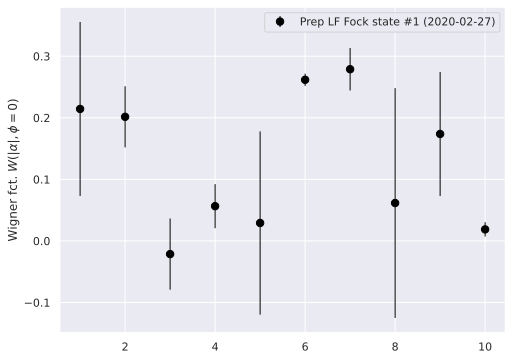

In [76]:
# mitteln über verschiedene n
from qutip import *

Nc=10
rho_pure = fock_dm(Nc, 1)
a = destroy(Nc)
rho = a.dag()*thermal_dm(Nc, .1)*a

sim_dat_x=[]
sim_dat_y=[]
sim_dat_pure=[]
for a in np.linspace(0, 2., 50):
        sim_dat_x.append(a)
        sim_dat_y.append(2*wigner(rho, 2**0.5*a,0)[0,0])
        sim_dat_pure.append(2*wigner(rho_pure, 2**0.5*a,0)[0,0])
  
sim_dat_x=np.array(sim_dat_x)
sim_dat_y=np.array(sim_dat_y)
sim_dat_pure=np.array(sim_dat_pure)

##Data for LF fck state 1 2020-02-27
# [pts_x,pts_y,pts_err]=[dat_x, dat_y, dat_err]

pts_x = np.transpose(dat_list[0])[0]
pts_y = []
pts_err = []
for i in range(len(dat_list[0])):
    list_y = [arr[i][1] for arr in dat_list]
    list_err = [arr[i][2] for arr in dat_list]
    pts_y.append(np.mean(list_y))
#     pts_err.append(np.std(list_y))
    pts_err.append(np.sqrt(np.sum(np.array(list_err)**2)/len(list_err)**2))
    
pts_x = np.linspace(1, len(pts_y), len(pts_y))


fig, ax = plt.subplots(1, 1, figsize=(8,6), sharex=True)
plt.errorbar(pts_x, pts_y, yerr=pts_err, marker = 'o', markersize=7.5, color='Black', lw=1., ls='',fmt='',capsize=.0, label='Prep LF Fock state #1 (2020-02-27)')

# plt.plot(sim_dat_x, sim_dat_y, color='black', linewidth=3, label='Calc. Fock state #1 wth thermal $<n>_{th}\simeq0.1$')
# plt.plot(sim_dat_x, sim_dat_pure, color='black', linestyle='dashed', label='Calc. pure Fock state #1')
# plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y >= 0, facecolor='Navy', interpolate=True, alpha=.3)
# plt.fill_between(sim_dat_x, 0, sim_dat_y, where=sim_dat_y <= 0, facecolor='Red', interpolate=True, alpha=.3)
# plt.xlabel(r'$|\alpha|$')
plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.legend()
# plt.ylim(-.7,.7)
plt.show()

## wigner function for differen measurement series

In [5]:
direct = '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/'
fnames2 = os.listdir(direct)
files = sorted([direct+f for f in fnames2])
# files = select_files(files, [16,48,00], [16,55,00]) # mode freq 1.2992, angle 0
files = select_files(files, [17,45,00], [17,53,00]) # mode freq 1.2973, angle 0, Omega 0.098, nth = 0.058, dec = 0.009
files

8 files


['/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_45_38_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_46_39_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_47_41_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_48_43_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_49_44_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_50_46_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_51_47_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/17_52_49_04_08_2020.dat']

In [18]:
direct = 'data/2020_08_04/Messreihe_1/'
fnames2 = os.listdir(direct)
files = sorted([direct+f for f in fnames2])
files

['data/2020_08_04/Messreihe_1/16_25_55_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_26_35_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_27_15_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_27_55_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_28_35_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_29_15_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_29_55_04_08_2020.dat',
 'data/2020_08_04/Messreihe_1/16_30_34_04_08_2020.dat']

z_axial_R1_R2: 17_45_38_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:48:21 2020
migrad finished at Thu Aug  6 10:48:40 2020


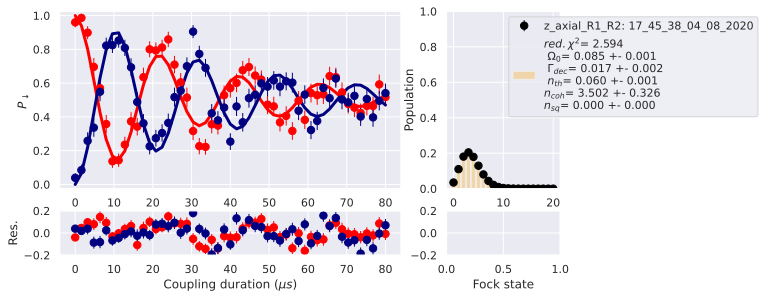

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_46_39_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:48:41 2020
migrad finished at Thu Aug  6 10:48:59 2020


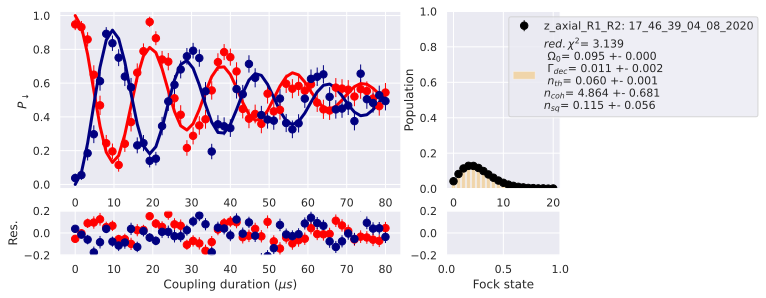

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_47_41_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:49:00 2020
migrad finished at Thu Aug  6 10:49:19 2020


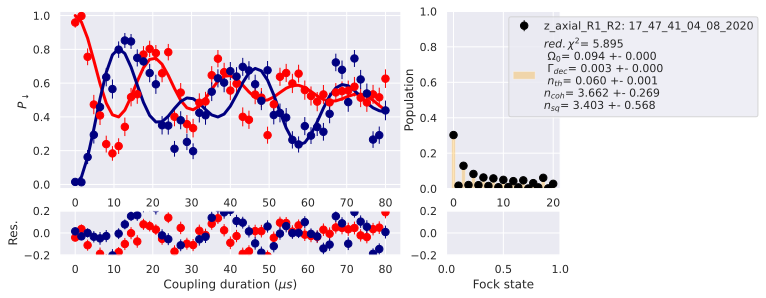

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_48_43_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:49:20 2020
migrad finished at Thu Aug  6 10:49:29 2020


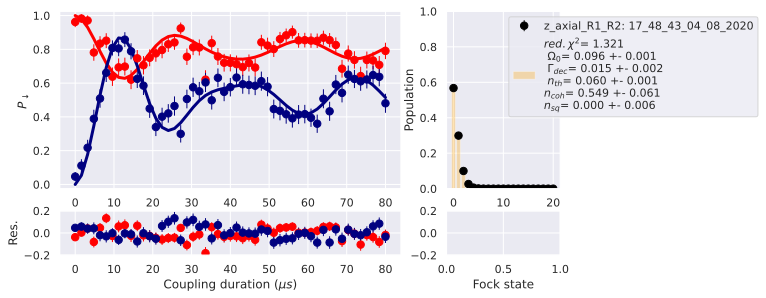

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_49_44_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:49:30 2020
migrad finished at Thu Aug  6 10:49:46 2020


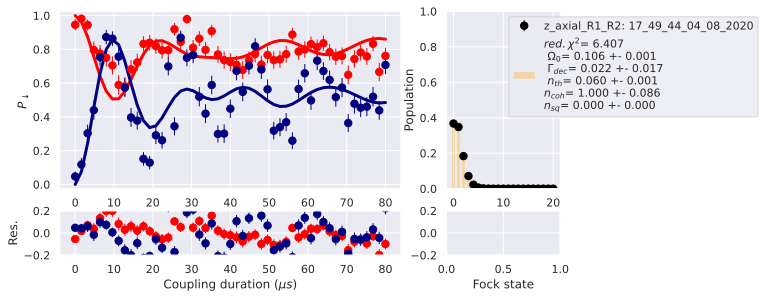

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_50_46_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:49:46 2020
migrad finished at Thu Aug  6 10:50:06 2020


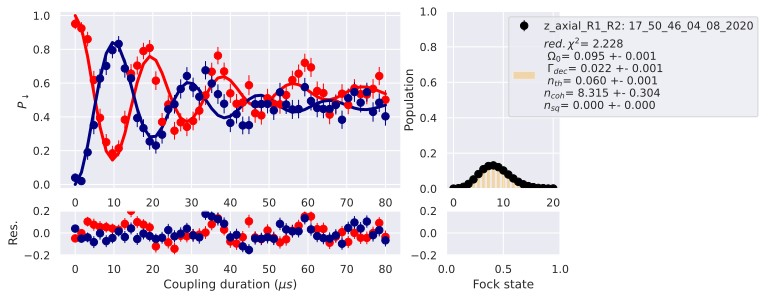

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_51_47_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:50:06 2020
migrad finished at Thu Aug  6 10:50:18 2020


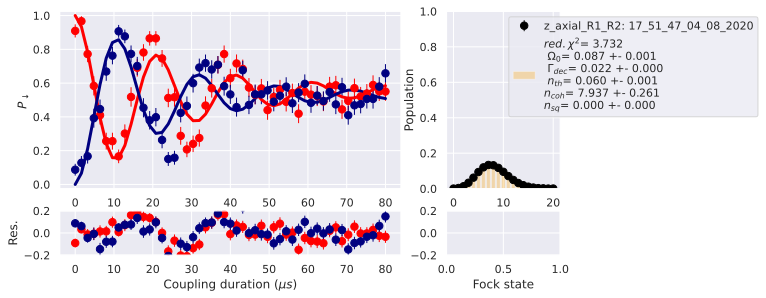

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 17_52_49_04_08_2020
Free parameter count 6
migrad started at Thu Aug  6 10:50:19 2020
migrad finished at Thu Aug  6 10:50:38 2020


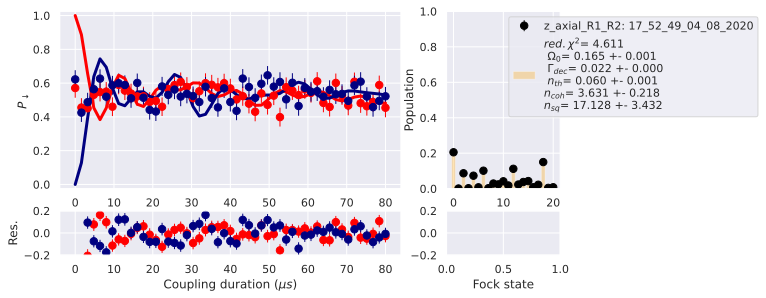

result for mode freq.: 1.2992  and mode angle: 0
processing time: 138.247 s


In [6]:
# do the analyzation
t1 = time.time()

# parallel over files, fast but without plots
# res = Parallel(n_jobs=-1, verbose=51)(delayed(wigner_from_file)(file, [9,10,11,12], mode_freq=1.2973, mode_angle=0,
#                                                                 verbose=True, parallel=False, fix=[1,1,0,0,0,0,0], Rabi_init=0.098, dec_init=0.009, nth=0.05, ncoh=0.5, fit_fock=1) for file in files)

# not parallel, slow but with plots
res = [wigner_from_file(file, [20], mode_freq=1.2992, mode_angle=0, verbose=True, parallel=False, fix=[0,0,0,0,1,0,0], Rabi_init=0.110, nth=0.06, ncoh=0.5, fit_fock=0) for file in files]
print('processing time:', np.round(time.time()-t1, 3), 's')

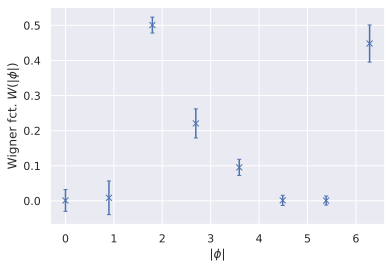

In [7]:
# plot it
x = np.linspace(0, 2*np.pi, len(np.transpose(res)[0]))

plt.errorbar(x, np.transpose(res)[0], np.transpose(res)[1], fmt='x')
# plt.ylim(-.5,.8)/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2

plt.xlabel(r'$|\phi|$')
plt.ylabel(r'Wigner fct. $ W(|\phi|)$')
# plt.xlabel(r'$|\alpha|$')
# plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.show()

[1.01909162 0.09259344 2.18014408 0.22227893]


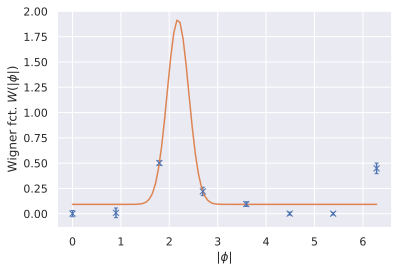

array([0.09259344, 0.09259344, 0.09259344, 0.09259344, 0.09259344,
       0.09259344, 0.09259344, 0.09259344, 0.09259344, 0.09259344,
       0.09259344, 0.09259344, 0.09259344, 0.09259345, 0.09259352,
       0.09259387, 0.09259543, 0.092602  , 0.09262726, 0.09271658,
       0.0930067 , 0.09387174, 0.09623796, 0.1021707 , 0.11579061,
       0.1443807 , 0.19915603, 0.29470009, 0.44589894, 0.66185804,
       0.93801232, 1.24983411, 1.55264914, 1.79048184, 1.91247383,
       1.89051414, 1.72975752, 1.4666603 , 1.15555488, 0.85050955,
       0.59069597, 0.39431778, 0.2610531 , 0.17928473, 0.13371305,
       0.11057041, 0.09983743, 0.09528394, 0.09351449, 0.09288406,
       0.09267796, 0.09261609, 0.09259903, 0.09259471, 0.0925937 ,
       0.09259349, 0.09259344, 0.09259344, 0.09259344, 0.09259344,
       0.09259344, 0.09259344, 0.09259344, 0.09259344, 0.09259344,
       0.09259344, 0.09259344, 0.09259344, 0.09259344, 0.09259344,
       0.09259344, 0.09259344, 0.09259344, 0.09259344, 0.09259

In [88]:
# plot it
def gauß_2pi(x, A, C, mu, sig):
#     d2 = np.min([(x-mu)**2, (x-2*np.pi-mu)**2])
    return(A/(sig*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mu)**2/sig**2) + C)

x = np.linspace(0, 2*np.pi, len(np.transpose(res)[0]))
xx = np.linspace(0, 2*np.pi, 100)

from scipy.optimize import curve_fit
params, _ = curve_fit(gauß_2pi,x,np.transpose(res)[0], [1, 0, 2, 1])
print(params)

plt.errorbar(x, np.transpose(res)[0], np.transpose(res)[1], fmt='x')
# plt.ylim(-.7,.7)

yy = [gauß_2pi(xxx, *params) for xxx in xx]
plt.plot(xx, yy)

plt.xlabel(r'$|\phi|$')
plt.ylabel(r'Wigner fct. $ W(|\phi|)$')
# plt.xlabel(r'$|\alpha|$')
# plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.show()

gauß_2pi(xx, *params)

Messreihe2: 11_19_39_31_07_2020
Free parameter count 11
migrad started at Fri Jul 31 15:43:17 2020
migrad finished at Fri Jul 31 15:43:23 2020


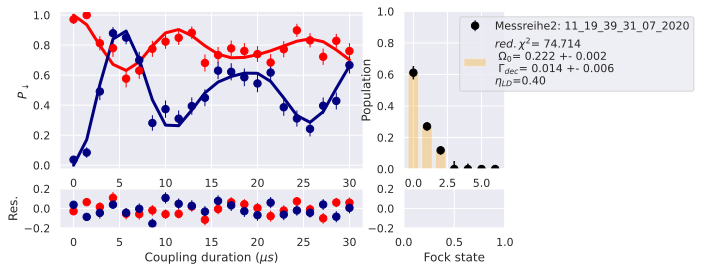

Messreihe2: 11_19_39_31_07_2020
Free parameter count 12
migrad started at Fri Jul 31 15:43:23 2020
migrad finished at Fri Jul 31 15:43:29 2020


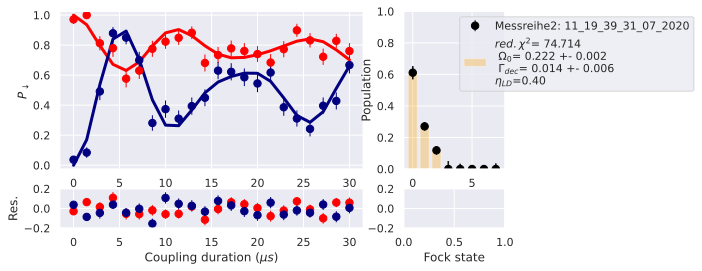

Messreihe2: 11_19_39_31_07_2020
Free parameter count 13
migrad started at Fri Jul 31 15:43:30 2020
migrad finished at Fri Jul 31 15:43:35 2020


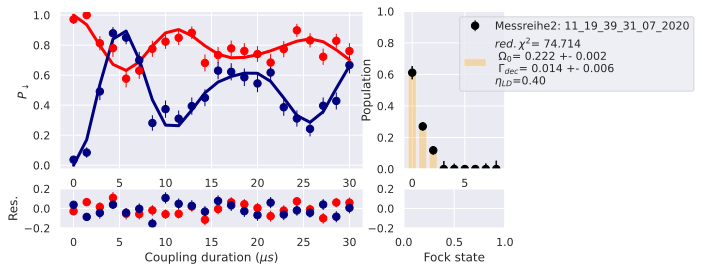

Messreihe2: 11_19_39_31_07_2020
Free parameter count 14
migrad started at Fri Jul 31 15:43:36 2020
migrad finished at Fri Jul 31 15:43:45 2020


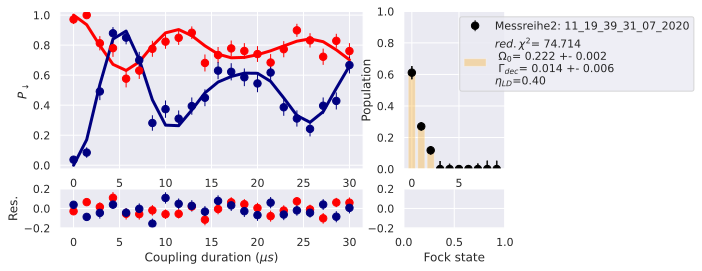

wigner func.:  0.29234529354182864 +- 0.0333590086333564


In [45]:
# look at the sideband fits for different points
paula.do_plot = True

w, w_err = wigner_from_file(files[4], [7,8,9,10], verbose=True, parallel=False)
print('wigner func.: ', w, '+-', w_err)

# new fit routine

In [5]:
direct = '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/'
fnames2 = os.listdir(direct)
files = sorted([direct+f for f in fnames2])
files = select_files(files, [16,48,00], [16,55,00]) # mode freq 1.2992, angle 0, Omega = 0.110
# files = select_files(files, [17,45,00], [17,52,00]) # mode freq 1.2973, angle 0, Omega 0.098, nth = 0.058, dec = 0.009
files

8 files


['/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_48_01_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_48_58_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_49_54_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_50_51_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_51_47_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_52_44_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_53_40_04_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2/16_54_37_04_08_2020.dat']

z_axial_R1_R2: 16_48_01_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:30 2020
migrad finished at Thu Aug  6 12:05:33 2020


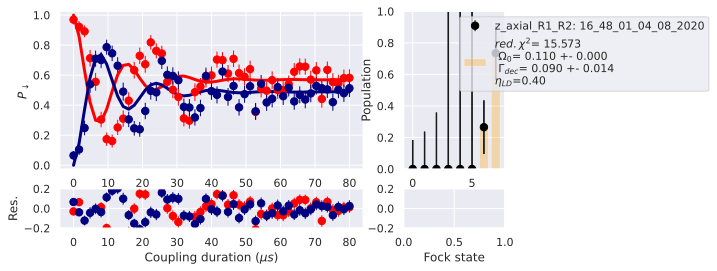

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_48_58_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:34 2020
migrad finished at Thu Aug  6 12:05:38 2020


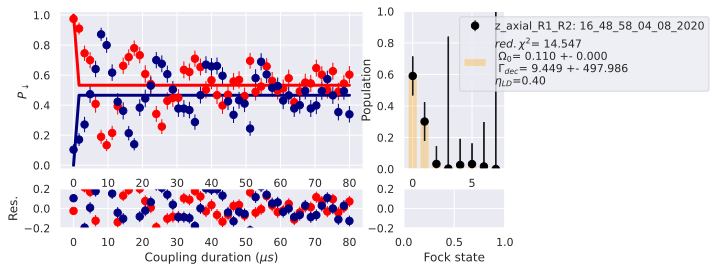

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_49_54_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:39 2020
migrad finished at Thu Aug  6 12:05:41 2020


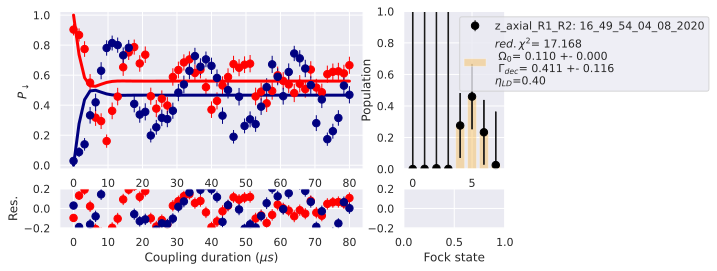

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_50_51_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:42 2020
migrad finished at Thu Aug  6 12:05:45 2020


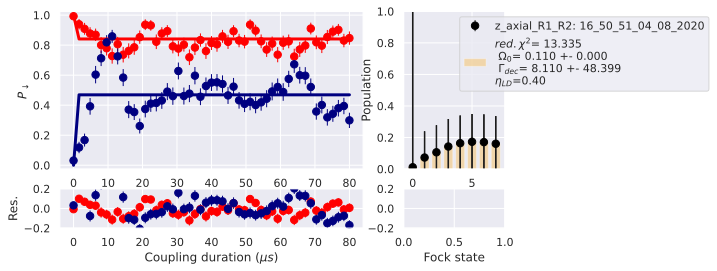

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_51_47_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:45 2020
migrad finished at Thu Aug  6 12:05:47 2020


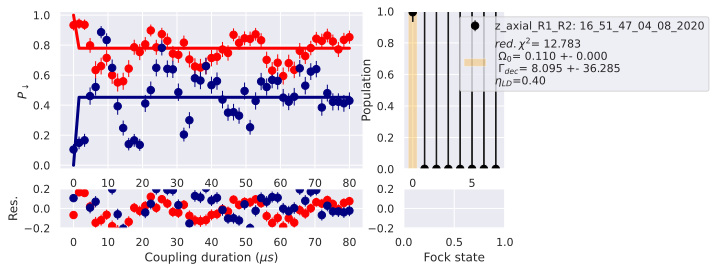

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_52_44_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:48 2020
migrad finished at Thu Aug  6 12:05:50 2020


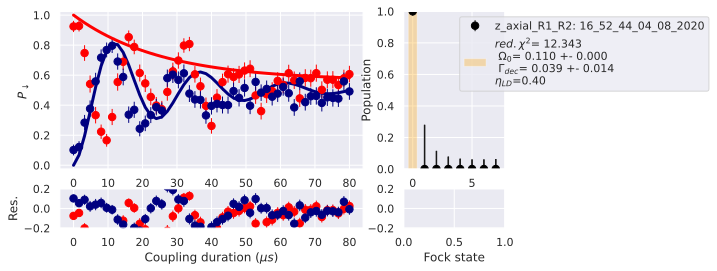

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_53_40_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:51 2020
migrad finished at Thu Aug  6 12:05:56 2020


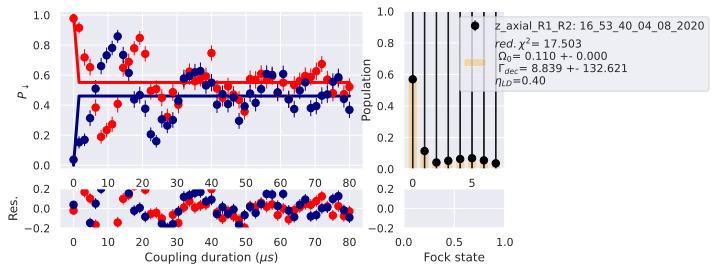

result for mode freq.: 1.2992  and mode angle: 0
z_axial_R1_R2: 16_54_37_04_08_2020
lamb dicke parameter: 0.39585617541742185
ddd
Free parameter count 11
R migrad started at Thu Aug  6 12:05:57 2020
migrad finished at Thu Aug  6 12:05:59 2020


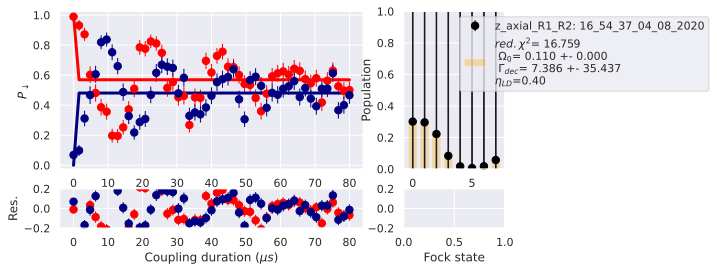

result for mode freq.: 1.2992  and mode angle: 0
processing time: 30.093 s


In [20]:
t1 = time.time()

res = [wigner_from_file(file, [8], mode_freq=1.2992, mode_angle=0, verbose=True, parallel=False,
                        fix=[1,0,0,0,0,0,0], Rabi_init=0.110, dec_init = 0.009, nth=0.06, ncoh=0.5, fit_fock=1) for file in files]

print('processing time:', np.round(time.time()-t1, 3), 's')

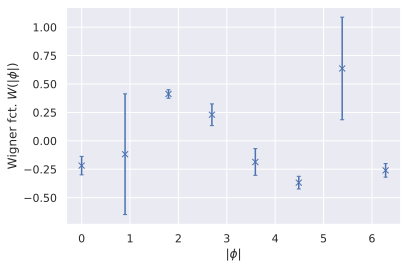

In [10]:
# plot it
x = np.linspace(0, 2*np.pi, len(np.transpose(res)[0]))

plt.errorbar(x, np.transpose(res)[0], np.transpose(res)[1], fmt='x')
# plt.ylim(-.5,.8)/mnt/paula/Results/tiamo4.sync/2020/08_August/04/OC_Axial/z_axial_R1_R2

plt.xlabel(r'$|\phi|$')
plt.ylabel(r'Wigner fct. $ W(|\phi|)$')
# plt.xlabel(r'$|\alpha|$')
# plt.ylabel(r'Wigner fct. $ W(|\alpha|, \phi=0)$')
plt.show()